# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Basic-settings" data-toc-modified-id="Basic-settings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic settings</a></div><div class="lev1 toc-item"><a href="#boxplot" data-toc-modified-id="boxplot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>boxplot</a></div><div class="lev1 toc-item"><a href="#BarPlot" data-toc-modified-id="BarPlot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>BarPlot</a></div><div class="lev1 toc-item"><a href="#DistPlot" data-toc-modified-id="DistPlot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DistPlot</a></div><div class="lev1 toc-item"><a href="#ViolinPlot-and-similars" data-toc-modified-id="ViolinPlot-and-similars-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ViolinPlot and similars</a></div><div class="lev1 toc-item"><a href="#lmPlot" data-toc-modified-id="lmPlot-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>lmPlot</a></div><div class="lev1 toc-item"><a href="#TimePlot" data-toc-modified-id="TimePlot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>TimePlot</a></div><div class="lev1 toc-item"><a href="#HeatMap" data-toc-modified-id="HeatMap-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>HeatMap</a></div><div class="lev1 toc-item"><a href="#JoinPlot---ScatterPlot" data-toc-modified-id="JoinPlot---ScatterPlot-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>JoinPlot - ScatterPlot</a></div><div class="lev1 toc-item"><a href="#PairPlot" data-toc-modified-id="PairPlot-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>PairPlot</a></div><div class="lev1 toc-item"><a href="#Unknown" data-toc-modified-id="Unknown-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Unknown</a></div><div class="lev1 toc-item"><a href="#Little-things-about-matplotlib-color" data-toc-modified-id="Little-things-about-matplotlib-color-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Little things about matplotlib color</a></div><div class="lev2 toc-item"><a href="#View-some-color-palettes" data-toc-modified-id="View-some-color-palettes-121"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>View some color palettes</a></div>

# Basic settings

!pip install seaborn

http://seaborn.pydata.org/api.html
* if you are plotting in mathplotlib and you want to switch to seaborn defaults, simply import the package.
* To control the style, use the axes_style() and set_style() functions. To scale the plot, use the plotting_context() and set_context() functions.
* you can also use the axes_style() function in a with statement to temporarily set plot parameters.

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

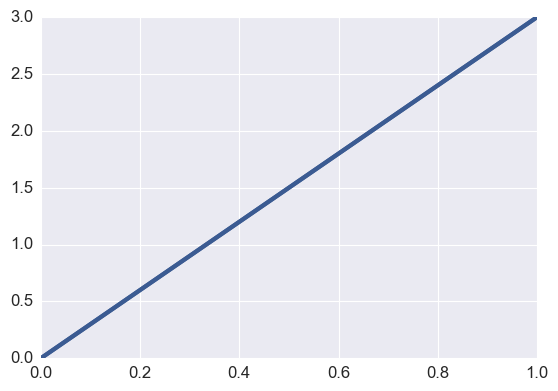

In [67]:
# you can select your color name from http://www.luminoso.com/colors/
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);
plt.show()

In [46]:
# set the style, default darkgrid
sns.set_style("darkgrid") # darkgrid, whitegrid, dark, white, ticks

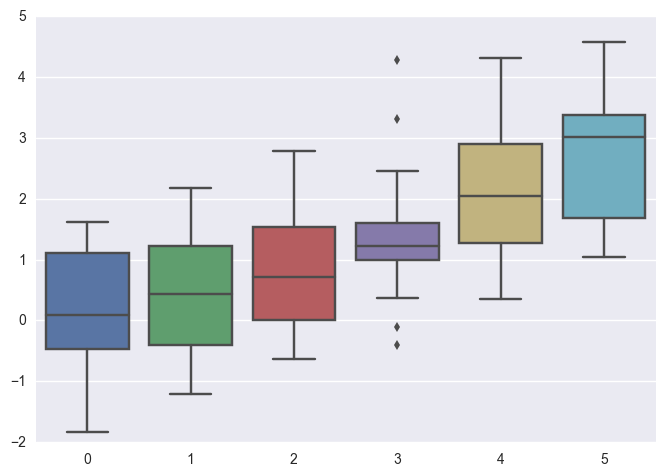

In [47]:
# modify the border of the plot
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)
sns.despine(offset=10,left=True,bottom=True)
sns.plt.show()

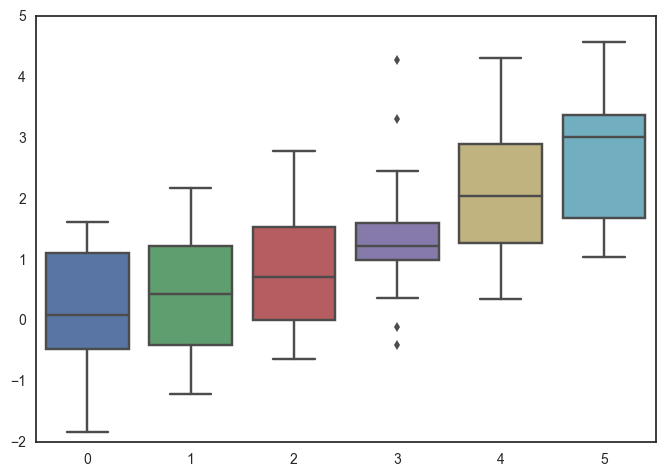

In [48]:
with sns.axes_style("white"):
    sns.boxplot(data=data)
    sns.plt.show()

In [51]:
# called it with void argument will print the current settings, you can change these settings passing a dictionary
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [54]:
sns.set_style("darkgrid", rc={"axes.facecolor": ".9","xtick.color":"green"})

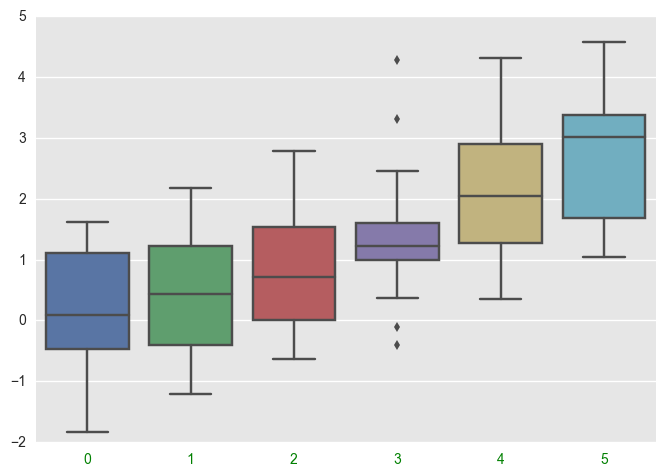

In [55]:
sns.boxplot(data=data)
sns.plt.show()

In [56]:
# reset the default parameters with 
sns.set()

# boxplot

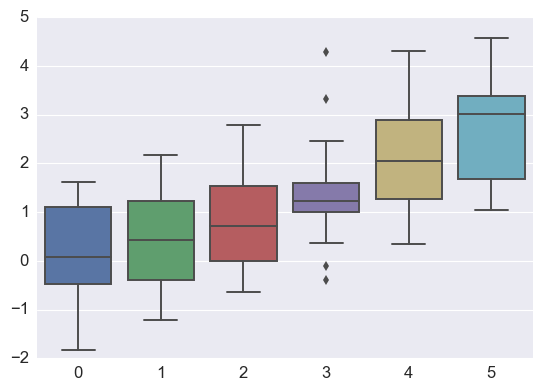

In [59]:
sns.set_context("paper", font_scale=1.5) # notebook, talk, poster
sns.boxplot(data=data)
sns.plt.show()

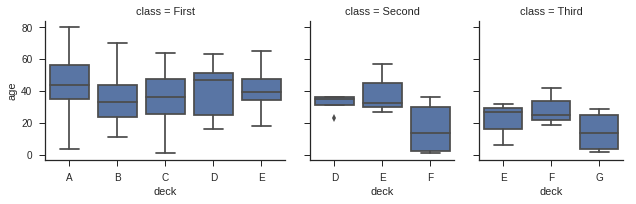

In [33]:
titanic = sns.load_dataset("titanic")
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values("deck")
g = sns.FacetGrid(titanic, col="class", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "deck", "age");

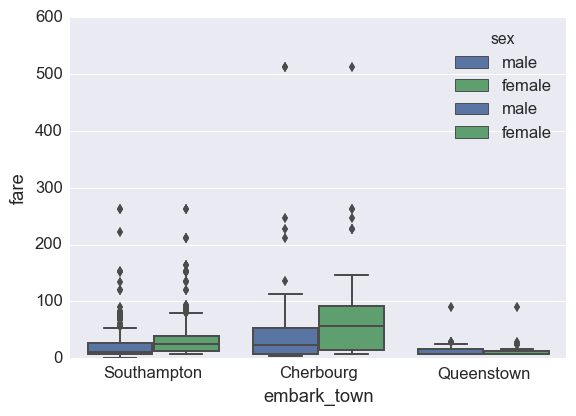

In [117]:
sns.boxplot(x="embark_town", y="fare", hue="sex", data=titanic);
sns.plt.show()

# BarPlot

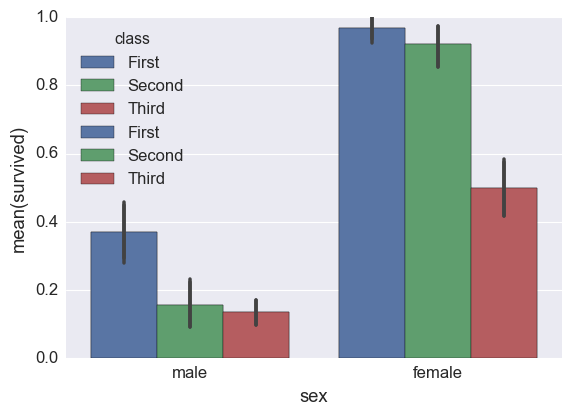

In [125]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);
sns.plt.show()

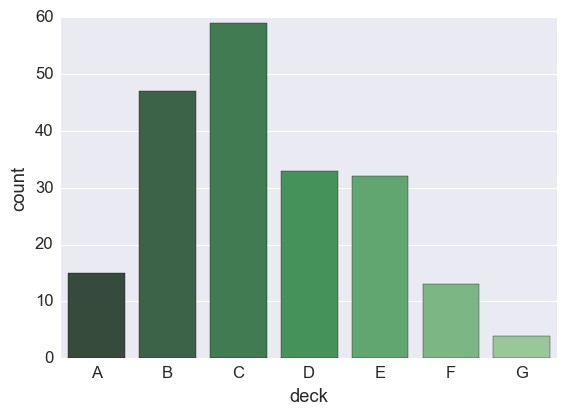

In [126]:
# histogram on categorical
sns.countplot(x="deck", data=titanic, palette="Greens_d");
sns.plt.show()

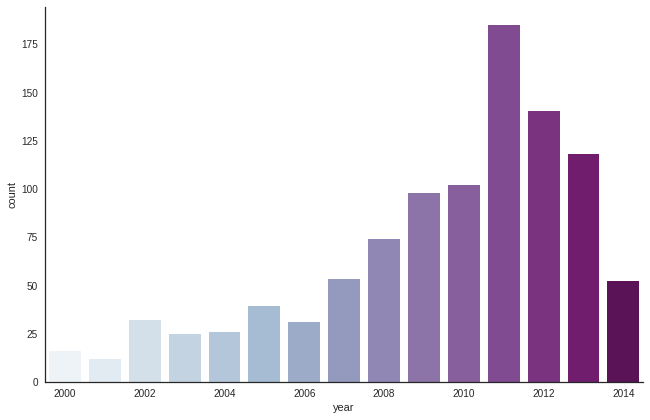

In [48]:
import numpy as np
import seaborn as sns
sns.set(style="white")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Make a range of years to show categories with no observations
years = np.arange(2000, 2015)

# Draw a count plot to show the number of planets discovered each year
g = sns.factorplot(x="year", data=planets, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=2)

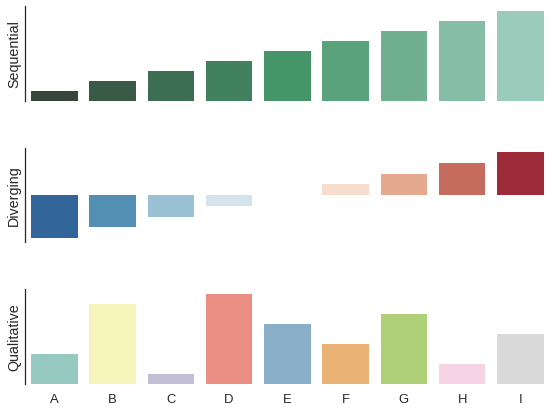

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(7)


# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHI"))
y1 = np.arange(1, 10)
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5
sns.barplot(x, y2, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, 9, replace=False)
sns.barplot(x, y3, palette="Set3", ax=ax3)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)

# DistPlot

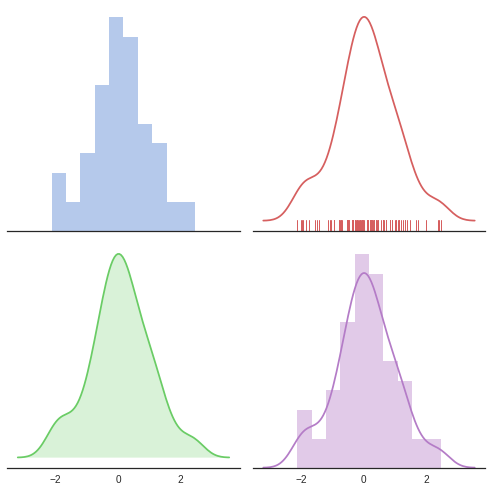

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

C:\Users\E3850002\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


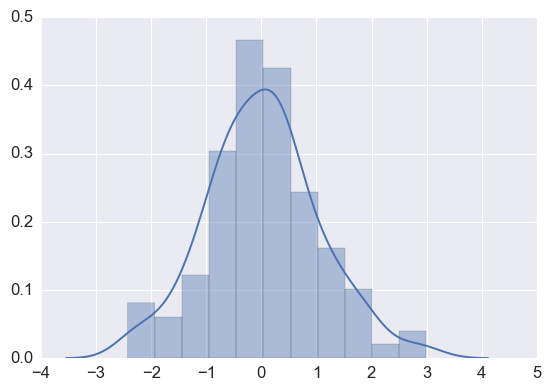

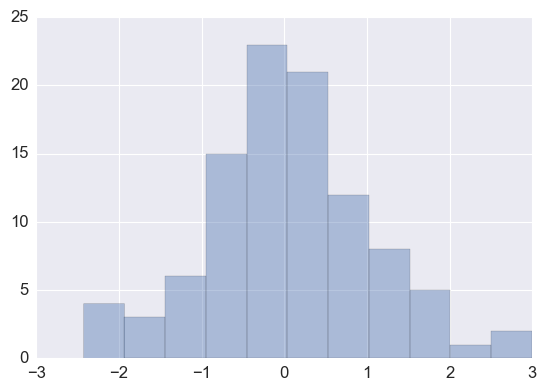

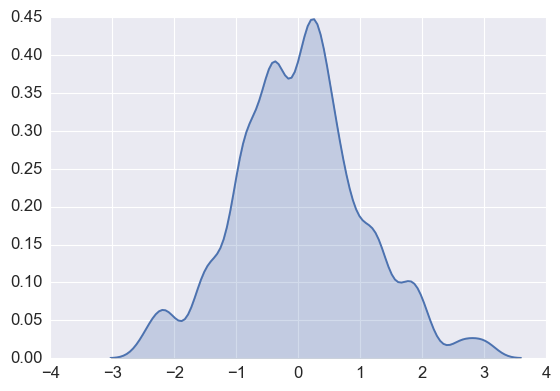

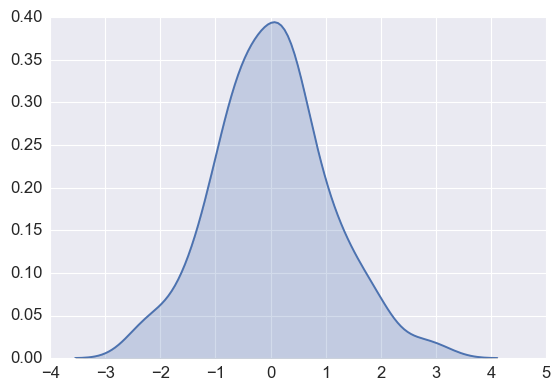

In [83]:
# plot a histogram or kde = kernel density estimation (replace each point with normal distribution and sum them up)
x = np.random.normal(size=100)
sns.distplot(x);
sns.plt.show()
sns.distplot(x,kde=False);
sns.plt.show()
sns.kdeplot(x, shade=True, bw=0.2); # control the bandwith of the kde
sns.plt.show()
sns.kdeplot(x, shade=True);
sns.plt.show()

# ViolinPlot and similars

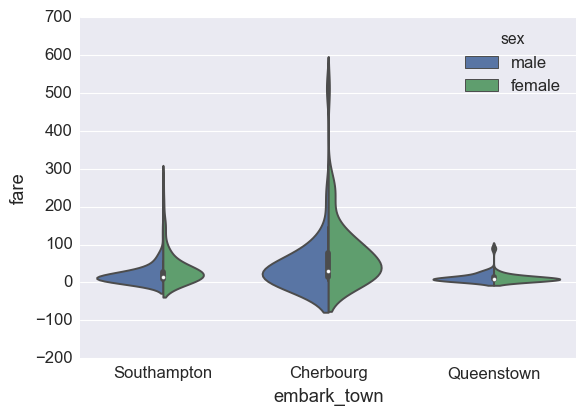

In [123]:
sns.violinplot(x="embark_town", y="fare", hue="sex", data=titanic, bw=0.5
              ,split=True); # violinplot use the kde, so you can set the bw too
sns.plt.show()

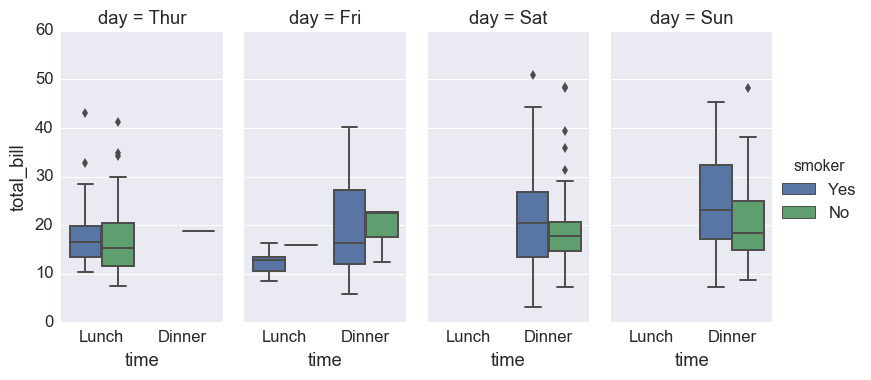

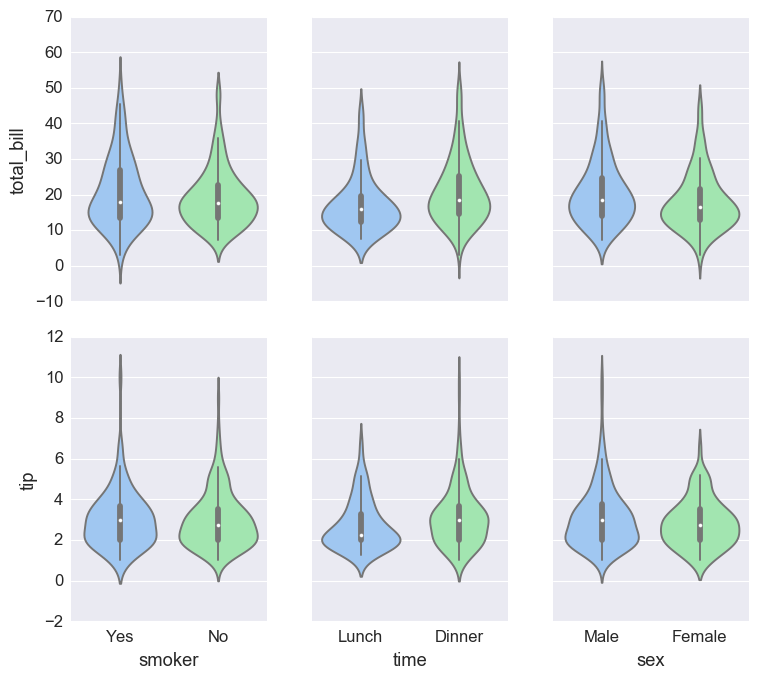

In [130]:
# multi-panel categorical plots
tips = sns.load_dataset("tips")

sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");
sns.plt.show()

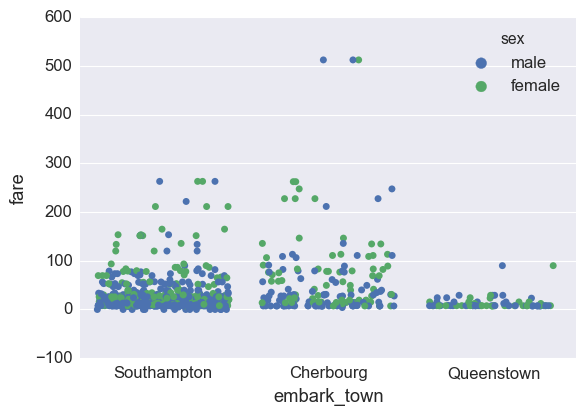

In [115]:
# jitter the data to tra to avoid overlapping
sns.stripplot(x="embark_town", y="fare", data=titanic, jitter=0.4, hue="sex"); 
sns.plt.show()

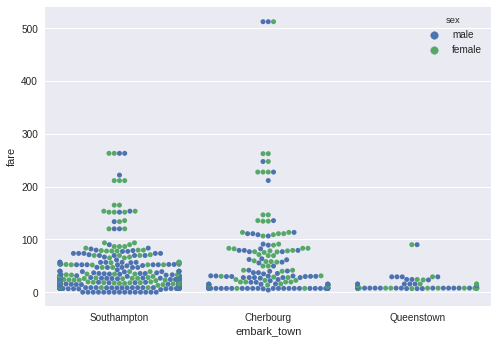

In [4]:
sns.swarmplot(x="embark_town", y="fare", data=titanic, hue="sex"); # no data overlap, it takes much more time
sns.plt.show()

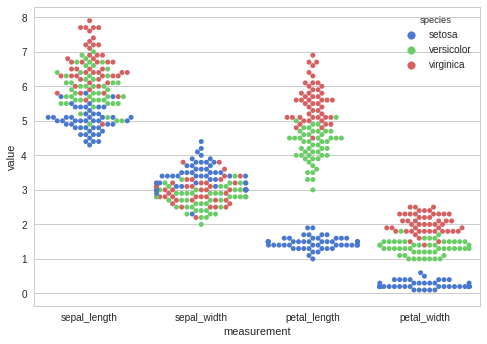

In [47]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris)

# lmPlot

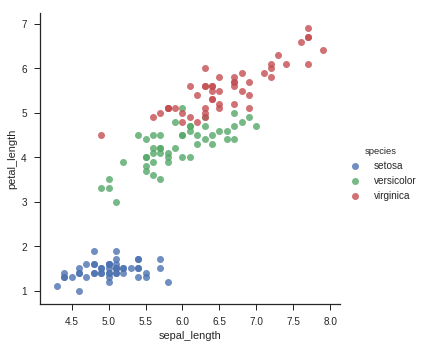

In [23]:
sns.lmplot("sepal_length", "petal_length", data=iris, hue='species', fit_reg=False)

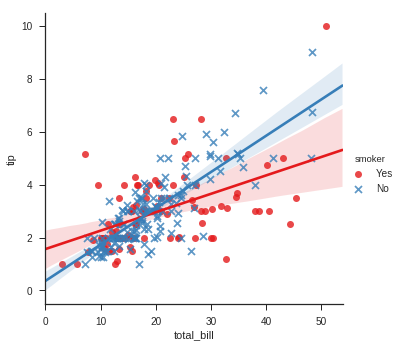

In [32]:
tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

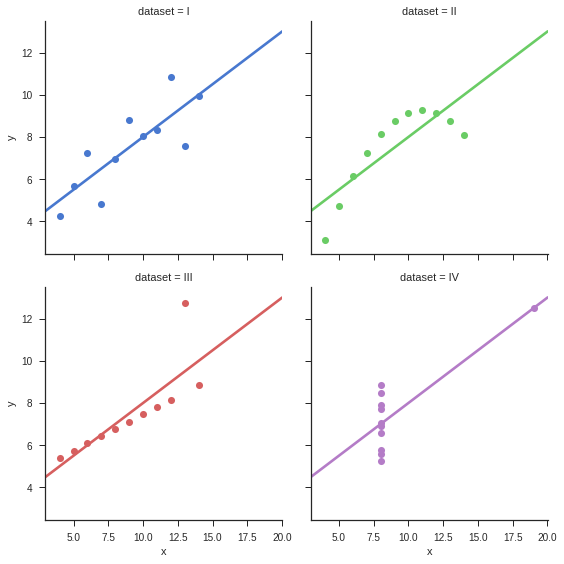

In [22]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

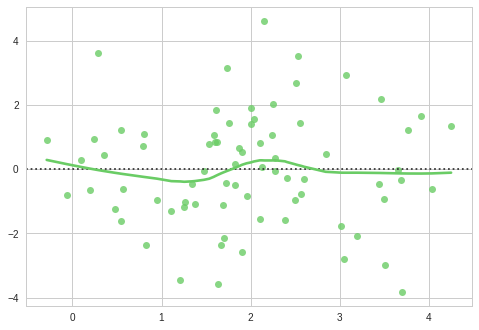

In [46]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")

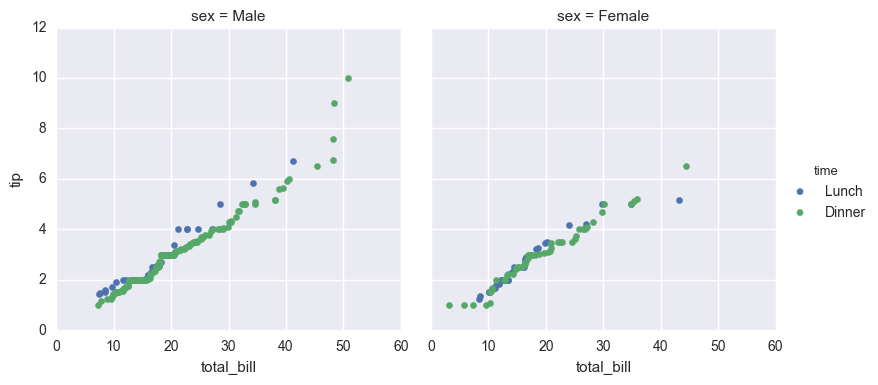

In [158]:
# using custom function
from scipy import stats

def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, hue="time", col="sex", size=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend();
sns.plt.show()

# TimePlot

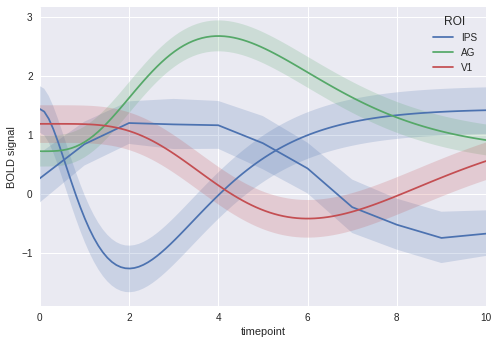

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992


In [6]:
# time series (tsplot)
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
ax = sns.tsplot(data=data)
gammas = sns.load_dataset("gammas")
ax = sns.tsplot(time="timepoint", value="BOLD signal", unit="subject", condition="ROI", data=gammas) 
# unit is a column of the dataframe, use all 0 values to uese a single element at time
# err_style = "ci_bars", "boot_traces", "unit_traces", 
sns.plt.show()
gammas.head()

# HeatMap

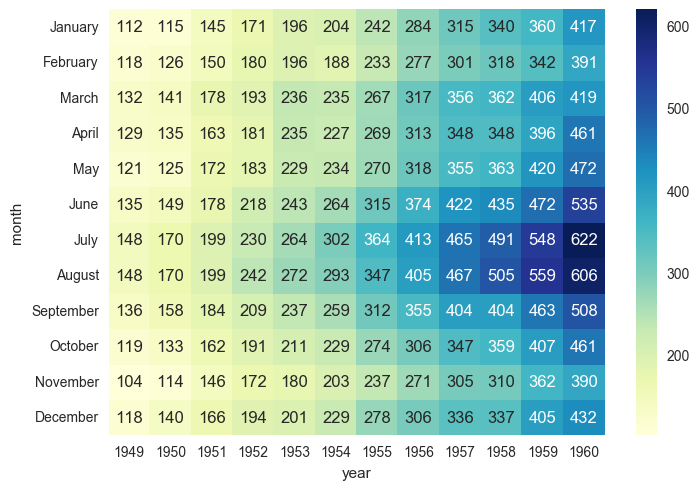

In [146]:
# heatmap
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={"orientation": "vertical"})
sns.plt.show()

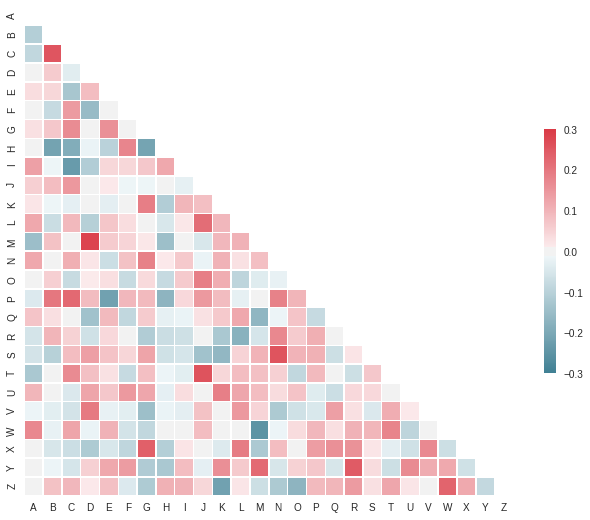

In [44]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/home/ale/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


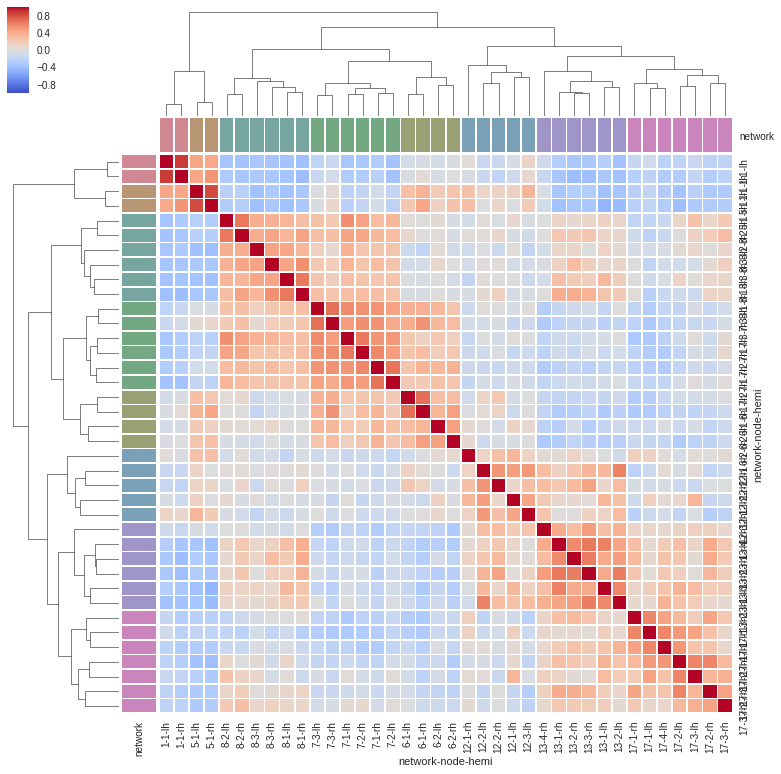

In [18]:
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="coolwarm",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))
sns.plt.show()

# JoinPlot - ScatterPlot

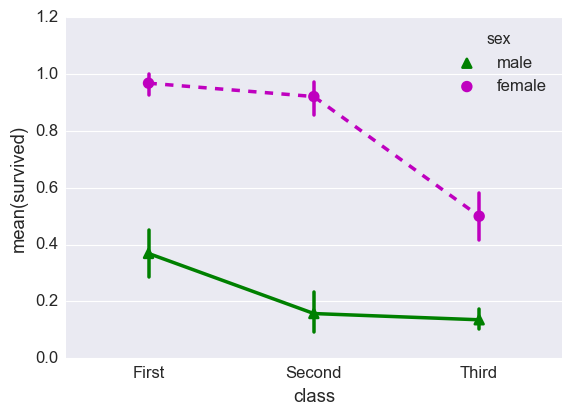

In [127]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);
sns.plt.show()

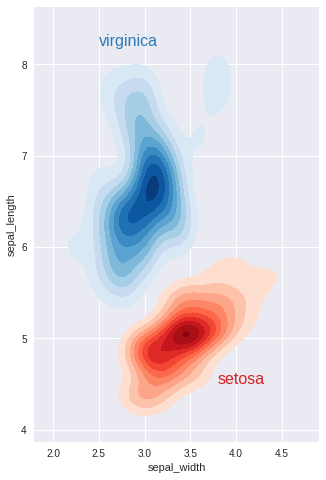

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

In [85]:
# PLOT bivariate distribution, directly using pandas dataframe
import pandas as pd
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

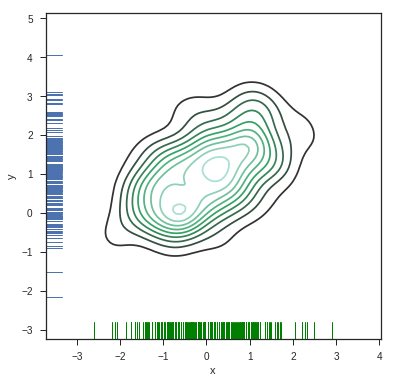

In [29]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

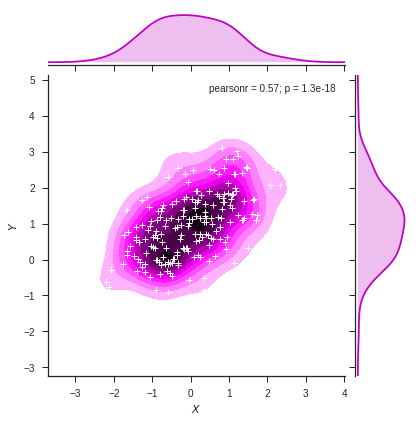

In [27]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

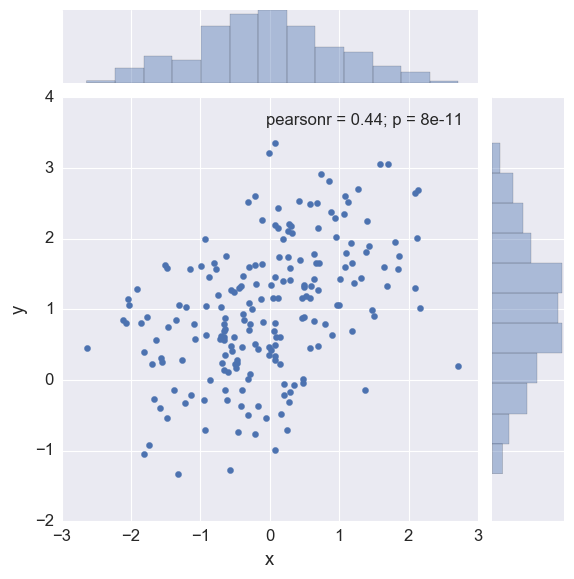

C:\Users\E3850002\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


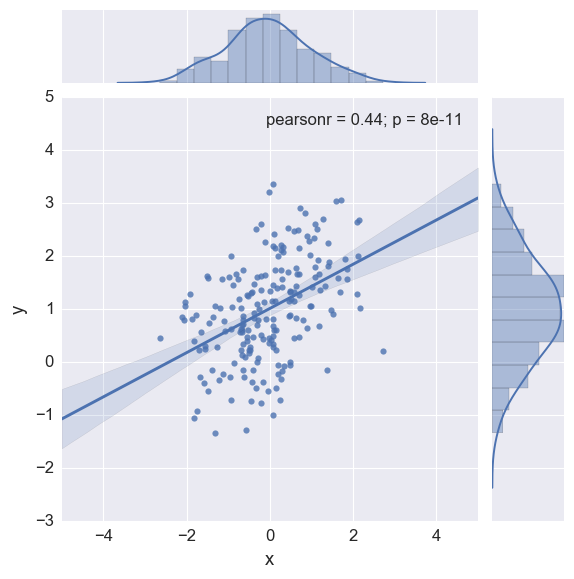

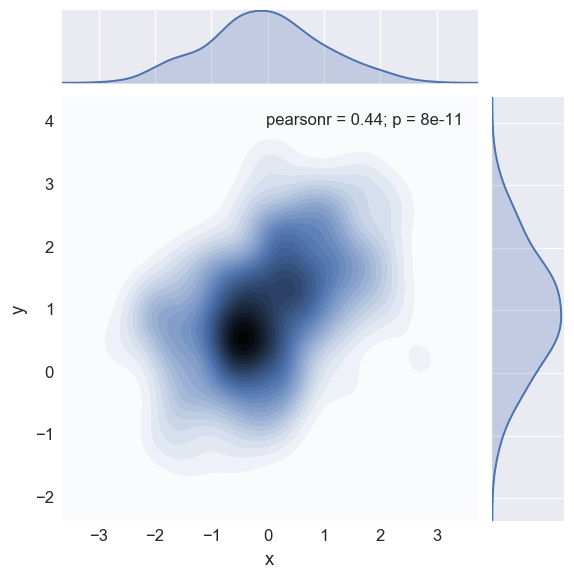

In [96]:
sns.jointplot(x="x", y="y", data=df, kind='scatter'); # "reg" | "resid" | "kde" | "hex"
sns.plt.show()
sns.jointplot(x="x", y="y", data=df, kind='reg');
sns.plt.show()
sns.jointplot(x="x", y="y", data=df, kind='kde', n_levels=30);
sns.plt.show()

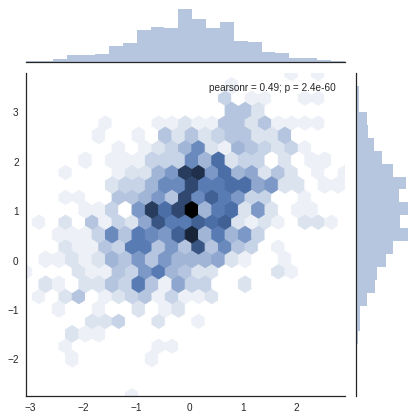

In [26]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex");

# PairPlot

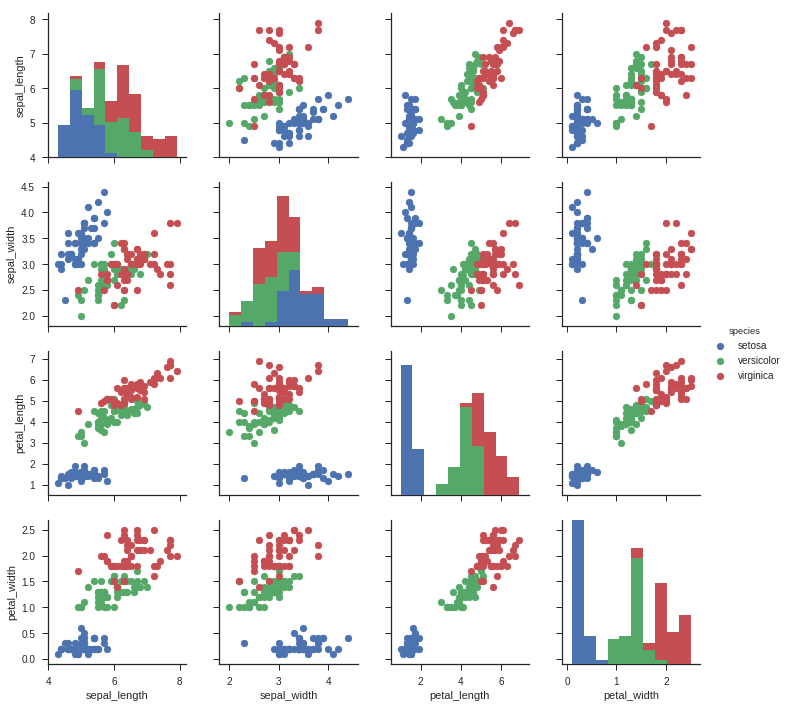

In [21]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
sns.plt.show()

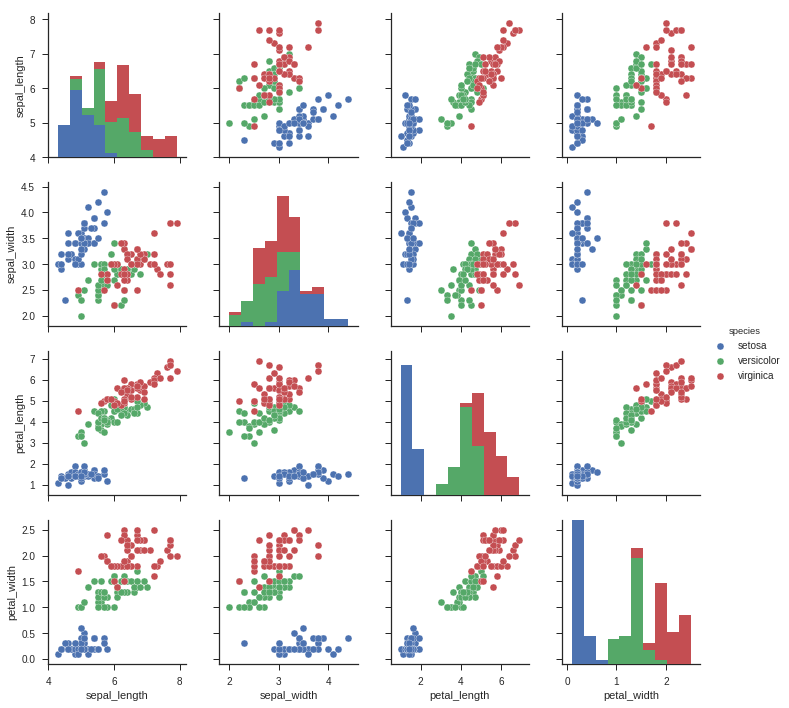

In [20]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
sns.plt.show()

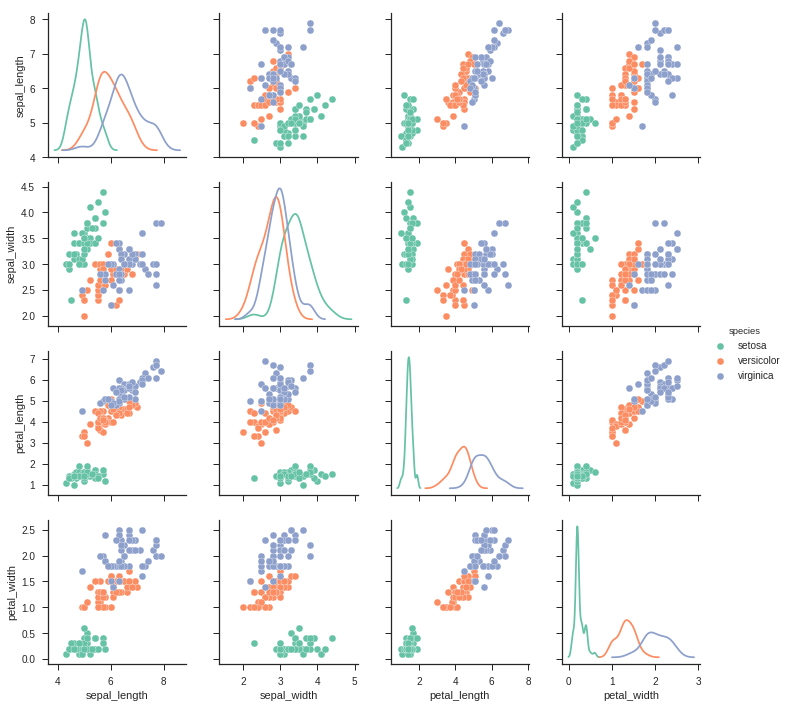

In [34]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)

C:\Users\E3850002\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\E3850002\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


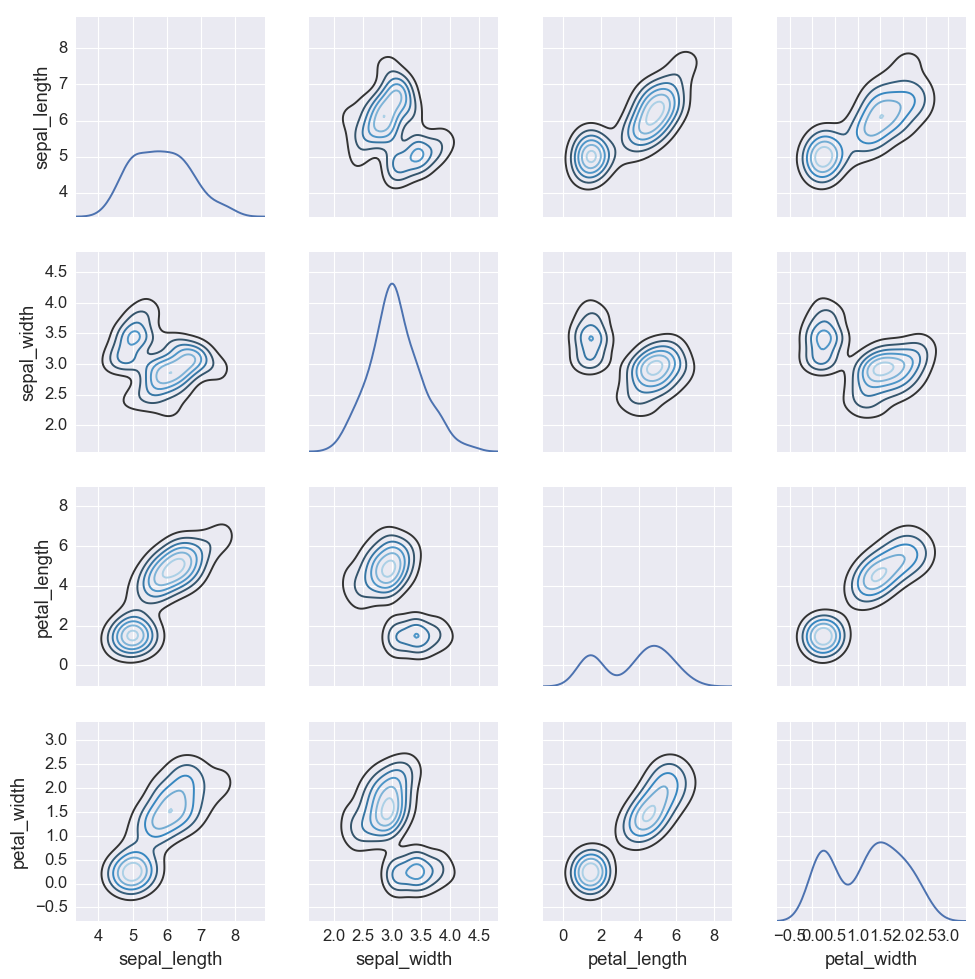

In [100]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);
sns.plt.show()

C:\Users\E3850002\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


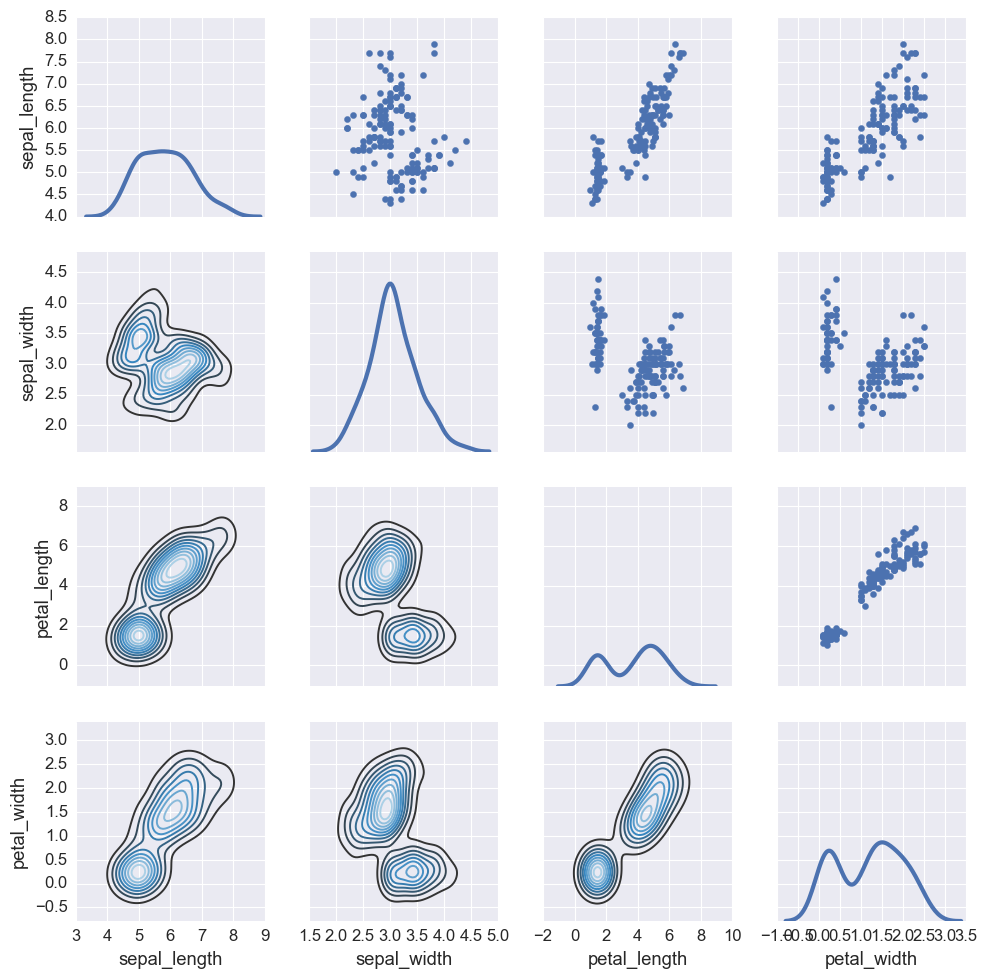

In [131]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);
sns.plt.show()

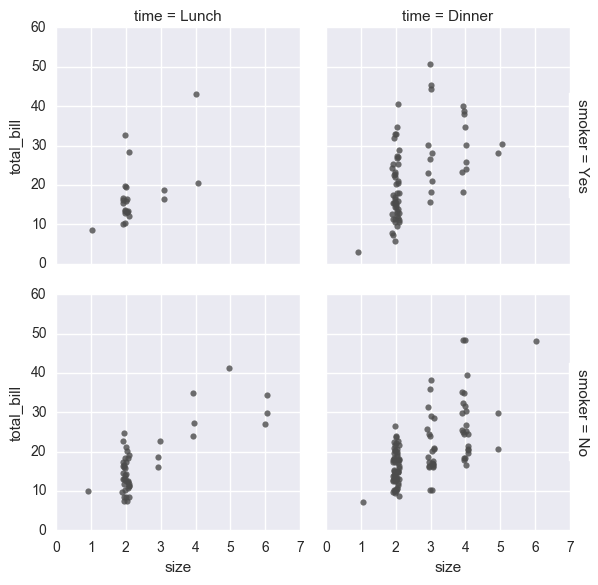

In [150]:
# multi subplot (from a dataframe)
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);
sns.plt.show()

# Unknown

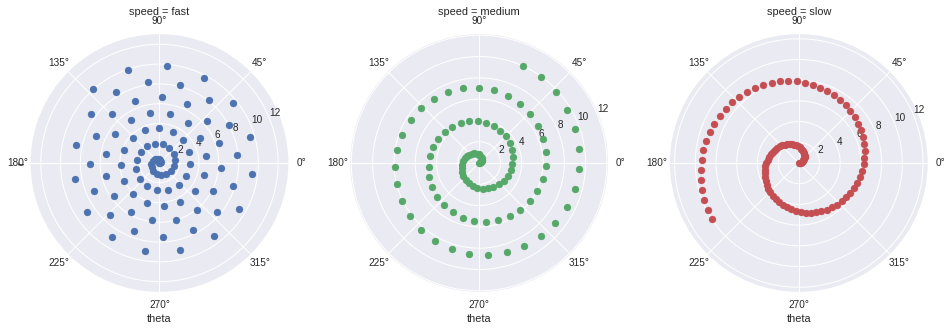

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), size=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(plt.scatter, "theta", "r")

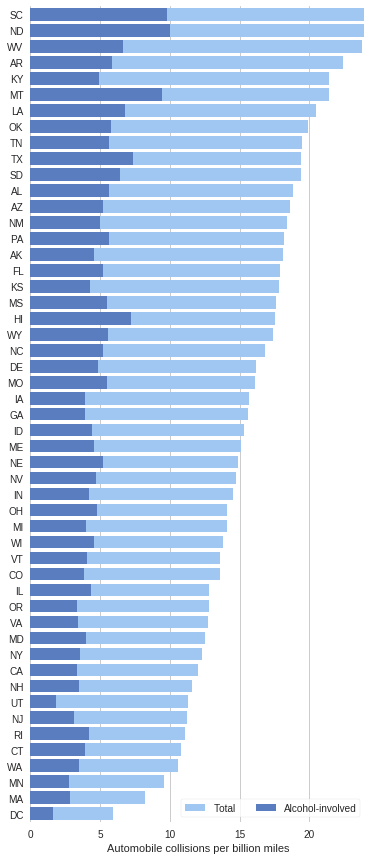

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

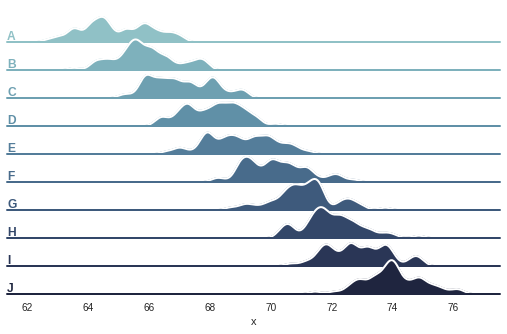

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

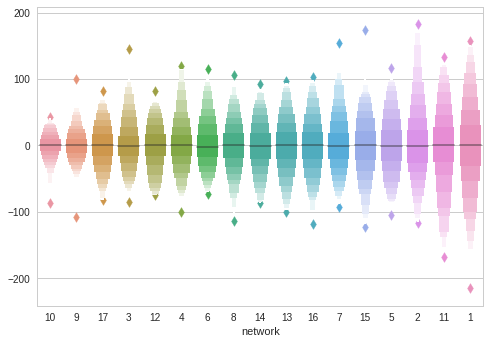

In [41]:
import seaborn as sns
sns.set(style="whitegrid")

networks = sns.load_dataset("brain_networks", index_col=0, header=[0, 1, 2])
networks = networks.T.groupby(level="network").mean().T
order = networks.std().sort_values().index

sns.lvplot(data=networks, order=order, scale="linear")

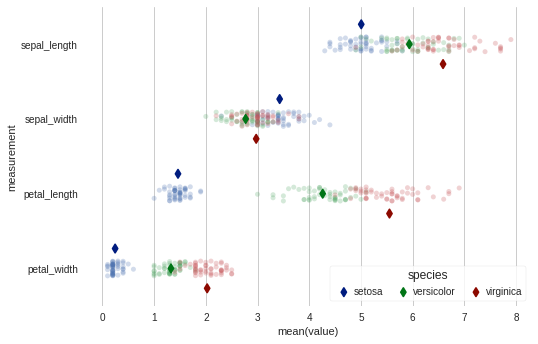

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

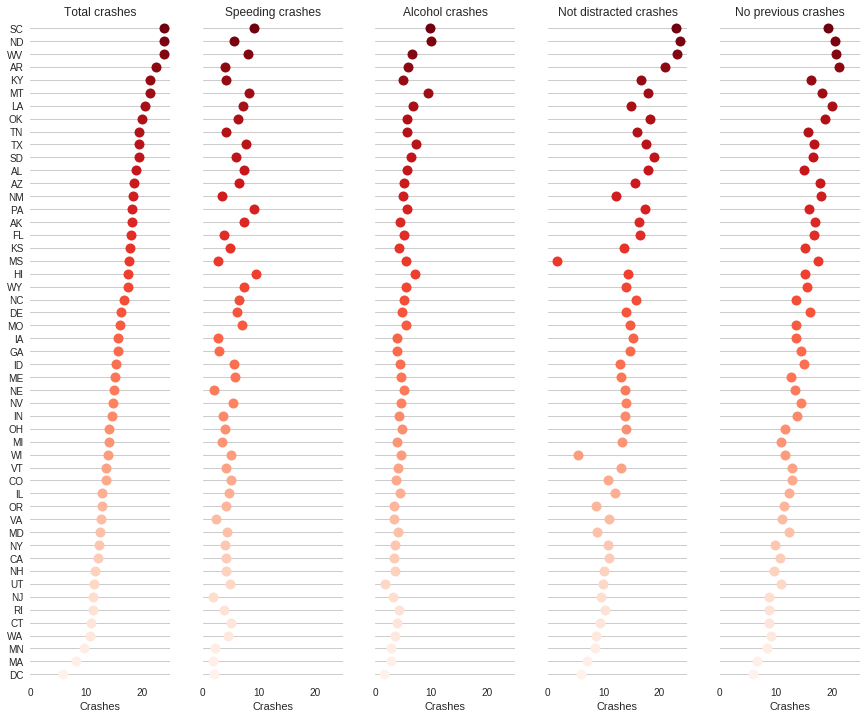

In [45]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# Little things about matplotlib color

- To have a dictionary with all the colors (only one work depending on your matplotlib version, the 1.5 version is reported in the cell below): 
- v2.0: http://matplotlib.org/examples/color/named_colors.html
- v1.5: http://matplotlib.org/1.5.1/examples/color/named_colors.html
- vx.y.z: http://matplotlib.org/x.y.z/examples/color/named_colors.html

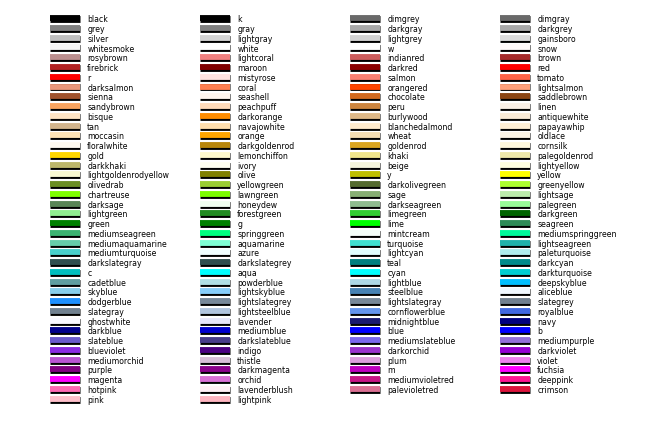

In [1]:
"""
Visualization of named colors.

Simple plot example with the named colors and its visual representation.
"""

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import six

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


colors_ = list(six.iteritems(colors.cnames))

# Add the single letter colors.
for name, rgb in six.iteritems(colors.ColorConverter.colors):
    hex_ = colors.rgb2hex(rgb)
    colors_.append((name, hex_))

# Transform to hex color values.
hex_ = [color[1] for color in colors_]
# Get the rgb equivalent.
rgb = [colors.hex2color(color) for color in hex_]
# Get the hsv equivalent.
hsv = [colors.rgb_to_hsv(color) for color in rgb]

# Split the hsv values to sort.
hue = [color[0] for color in hsv]
sat = [color[1] for color in hsv]
val = [color[2] for color in hsv]

# Sort by hue, saturation and value.
ind = np.lexsort((val, sat, hue))
sorted_colors = [colors_[i] for i in ind]

n = len(sorted_colors)
ncols = 4
nrows = int(np.ceil(1. * n / ncols))

fig, ax = plt.subplots()

X, Y = fig.get_dpi() * fig.get_size_inches()

# row height
h = Y / (nrows + 1)
# col width
w = X / ncols

for i, (name, color) in enumerate(sorted_colors):
    col = i % ncols
    row = int(i / ncols)
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    # Add extra black line a little bit thicker to make
    # clear colors more visible.
    ax.hlines(y, xi_line, xf_line, color='black', linewidth=(h * 0.7))
    ax.hlines(y + h * 0.1, xi_line, xf_line, color=color, linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

## View some color palettes

In [16]:
#example palette syntax
sns.color_palette('rainbow', n_colors= 10, desat=0.6)

[(0.44567726705784316, 0.4216621167335364, 0.8479006891439143),
 (0.3033968780945333, 0.5419874249163354, 0.7959404535546046),
 (0.2151457063198059, 0.6412389577009885, 0.7370534135145177),
 (0.36573394161392336, 0.7747004723380471, 0.7322933257731298),
 (0.5258391799110433, 0.8739449549382909, 0.7331864678012631),
 (0.6701529054012394, 0.91002338631084, 0.7092055683504881),
 (0.7529681423201782, 0.8372287906913606, 0.6158472150271773),
 (0.8495300870241924, 0.7250351031112577, 0.521649759861476),
 (0.8559165185193487, 0.5780364771058569, 0.4236660740773952),
 (0.8282412303646184, 0.39599078592266457, 0.312964921458473)]

rainbow


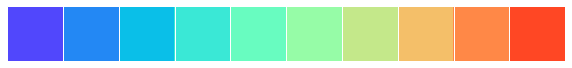

hls


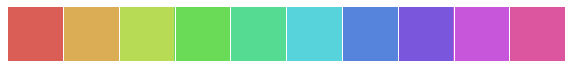

Set1


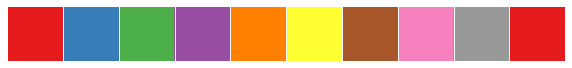

deep


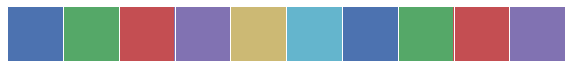

muted


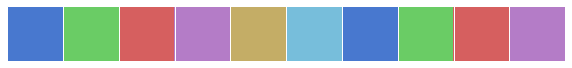

bright


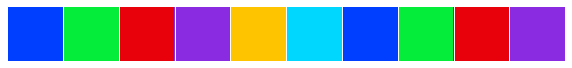

dark


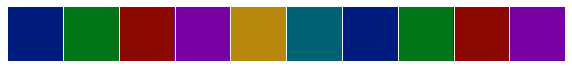

colorblind


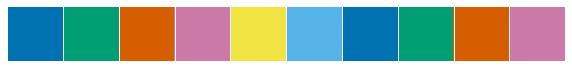

Paired


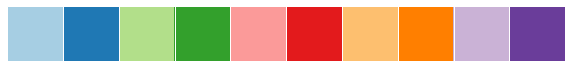

BuGn


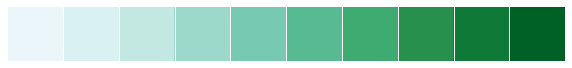

GnBu


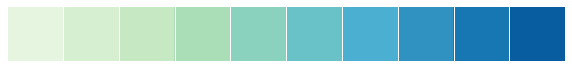

OrRd


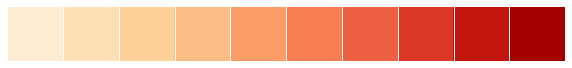

PuBu


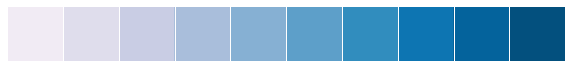

YlGn


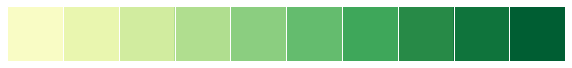

YlGnBu


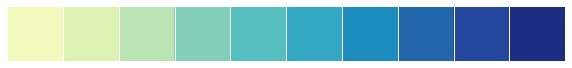

YlOrBr


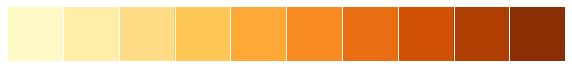

YlOrRd


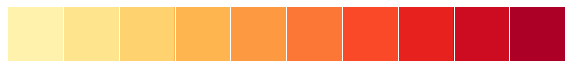

BrBG


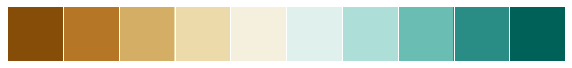

PiYG


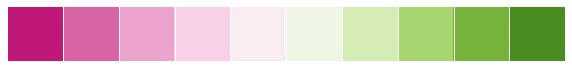

PRGn


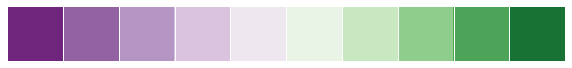

PuOr


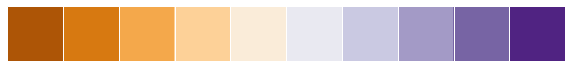

RdBu


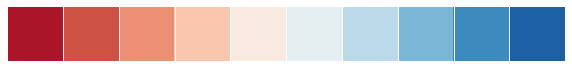

RdGy


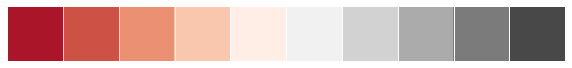

RdYlBu


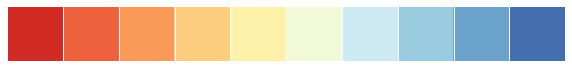

RdYlGn


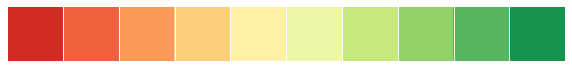

Spectral


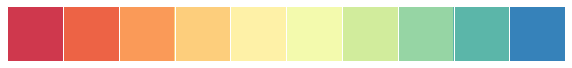

In [17]:
%matplotlib inline
list_palette = [
    'rainbow',
    'hls',
    'Set1',
    'deep',
    'muted',
    'bright',
    'dark',
    'colorblind',
    'Paired',
    'BuGn',
    'GnBu',
    'OrRd',
    'PuBu',
    'YlGn',
    'YlGnBu',
    'YlOrBr',
    'YlOrRd',
    'BrBG',
    'PiYG',
    'PRGn',
    'PuOr',
    'RdBu',
    'RdGy',
    'RdYlBu',
    'RdYlGn',
    'Spectral'
]
for i in list_palette:
    print(i)
    sns.palplot(sns.color_palette(i, 10))
    sns.plt.show()

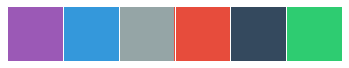

In [9]:
## create your own palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())